In [0]:
from fastai.tabular import *

In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/adult_sample/models'),
 PosixPath('/root/.fastai/data/adult_sample/export.pkl'),
 PosixPath('/root/.fastai/data/adult_sample/adult.csv')]

In [4]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)


In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
        .split_by_idx(list(range(800, 1000)))
        .label_from_df(cols=dep_var)
        .add_test(test, label=0)
        .databunch())

In [12]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Bachelors,Married-civ-spouse,Sales,Husband,White,False,-0.5561,0.1081,1.1422,>=50k
Private,Bachelors,Never-married,Sales,Own-child,White,False,-0.7027,1.5321,1.1422,<50k
Private,HS-grad,Separated,Handlers-cleaners,Other-relative,White,False,-1.1425,-0.3888,-0.4224,<50k
Local-gov,HS-grad,Divorced,Protective-serv,Own-child,White,False,-0.6294,1.3094,-0.4224,<50k
State-gov,7th-8th,Widowed,Other-service,Other-relative,White,False,1.9360,-1.5211,-2.3781,<50k


In [0]:
learn = tabular_learner(data, layers=[200, 100], metrics=accuracy)

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


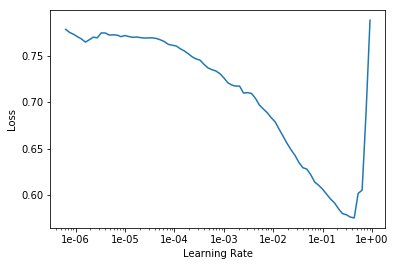

In [16]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.365005,0.387807,0.830000,00:04


In [0]:
row = df.iloc[0] 

In [21]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4572, 0.5428]))